In [1]:
from pathlib import Path
from keyword_spotting.utils import (add_noise, play_audio_from_file, play_audio_from_array, 
                                    load_model)
from keyword_spotting.predictions import predict_audio, get_label
from keyword_spotting.feature_extraction.utils import read_wav, extract_features
import pickle
import numpy as np
import matplotlib.pyplot as plt

from simpleaudio import WaveObject

# Data augmentation: Noise adding

In [18]:
with open(DATASET_PATH / 'X_train.pickle', 'rb') as file:
    wavs = pickle.load(file)

In [19]:
sample_rate, signal = read_wav(DATASET_PATH / wavs[56])
sample_rate_noise, signal_noise = add_noise(sample_rate, signal, DATASET_PATH, random_noise=False, noise_factor=0.5)

In [20]:
play_audio_from_array(signal)

SimpleaudioError: Error opening PCM device. -- CODE: -16 -- MSG: Device or resource busy

In [6]:
play_audio_from_array(signal_noise)

SimpleaudioError: Error opening PCM device. -- CODE: -16 -- MSG: Device or resource busy

# Feature extraction

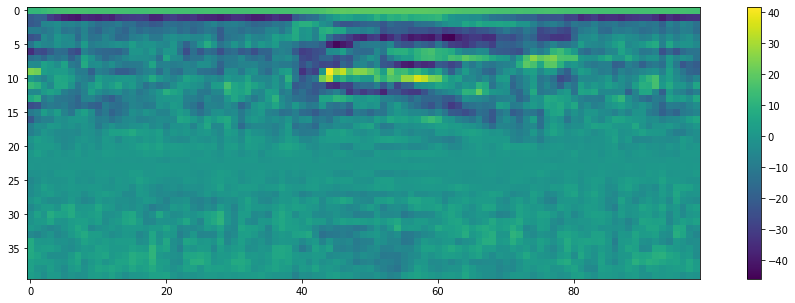

In [7]:
q = extract_features(signal, sample_rate)
fig, ax = plt.subplots(figsize=(17, 5))
image = ax.imshow(q.T)
fig.colorbar(image)

# Predict on an audio 

In [8]:
model = load_model('../models/res3')

In [15]:
k = 556
sample_rate, signal = read_wav(DATASET_PATH / wavs[k])
wavs[k]

'stop/29229c21_nohash_2.wav'

In [16]:
get_label(predict_audio(model, signal, sample_rate))

'stop'